In [4]:
import sys

sys.path.append("../")
from scipy.constants import eV
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from src.fem_radial import *

In [5]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [6]:
K = fem.get_K()
V = fem.get_V()
M = fem.get_M()

In [7]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")
vec = vec / np.linalg.norm(vec, axis=0)

Text(0, 0.5, 'Wavefunction')

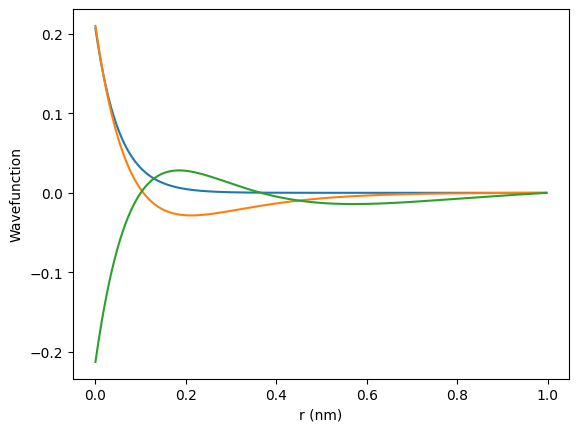

In [8]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, vec)
ax.set_xlabel("r (nm)")
ax.set_ylabel("Wavefunction")

In [9]:
val

array([-2.17976186e-18, -5.44810452e-19, -2.06719957e-19])

In [10]:
val / eV

array([-13.60500342,  -3.40043938,  -1.29024449])